## Exploratory Data Analysis

In [3]:
import json
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [10]:
# Loading model results from json files
with open("../results/tab_results.json") as file:
    tab_results = json.load(file)

with open("../results/gnn_results.json") as file:
    gnn_results = json.load(file)

# Verify contents
tab_results, gnn_results

([{'model': 'LogisticRegression',
   'accuracy': 0.9473094170403588,
   'macro_f1': 0.9475890498653949},
  {'model': 'RandomForest',
   'accuracy': 0.9899103139013453,
   'macro_f1': 0.9899126296669833}],
 {'model': 'Graph',
  'accuracy': 0.9697309417040358,
  'macro_f1': 0.9695997209014057,
  'best_val_accuracy': 0.9775910364145658})

In [ ]:

rows = tab_results + [gnn_results]

df = pd.DataFrame(rows)
df

,model,accuracy,macro_f1,best_val_accuracy
0,LogisticRegression,0.947309,0.947589,NaN
1,RandomForest,0.989910,0.989913,NaN
2,Graph,0.969731,0.969600,0.977591


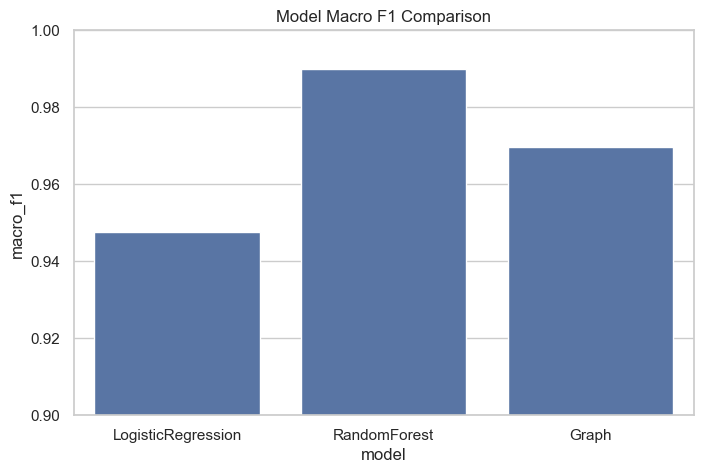

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x="model",
    y="macro_f1"
)

plt.title("Model Macro F1 Comparison")
plt.ylim(0.90, 1.00)
plt.show()